In [47]:
import faiss
import numpy as np
import pandas as pd
import scipy
from scipy.spatial.distance import cosine
from scipy.misc import imread
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline
sns.set()

In [7]:
DATASET = 'data/LOCALHIST_CORRUPT'
TRAIN_CSV = DATASET+'_df.csv'
SUBCLIPS_CSV = DATASET+'_subclips.csv'

In [8]:
train_df = pd.read_csv(TRAIN_CSV)
train_df.head()

,video_path,frame_time,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_890,x_891,x_892,x_893,x_894,x_895,x_896,x_897,x_898,x_899
0,../data/1943 - Victory Through Air Power.avi,0.033367,0.000000,0.0,0.0,0.000000,0.000000,0.140162,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,../data/1943 - Victory Through Air Power.avi,2.035369,0.000108,0.0,0.0,0.000000,0.000044,0.007993,0.000000,0.000355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,../data/1943 - Victory Through Air Power.avi,2.068735,0.000058,0.0,0.0,0.000105,0.000036,0.009339,0.000008,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,../data/1943 - Victory Through Air Power.avi,2.102102,0.000017,0.0,0.0,0.000147,0.000103,0.008468,0.000019,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,../data/1943 - Victory Through Air Power.avi,2.135469,0.000006,0.0,0.0,0.000203,0.000050,0.008313,0.000011,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
subclips_df = pd.read_csv(SUBCLIPS_CSV)
subclips_df.head()

,clip_path,frame_time,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_891,x_892,x_893,x_894,x_895,x_896,x_897,x_898,x_899,video_path
0,./tmp/1943 - Victory Through Air Power.avi_sub...,0.000000,0.000003,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../data/1943 - Victory Through Air Power.avi
1,./tmp/1943 - Victory Through Air Power.avi_sub...,7.173841,0.000380,0.001302,0.000158,0.000158,0.0,0.0,0.000278,0.001946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../data/1943 - Victory Through Air Power.avi
2,./tmp/1943 - Victory Through Air Power.avi_sub...,7.207207,0.000003,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../data/1943 - Victory Through Air Power.avi
3,./tmp/1943 - Victory Through Air Power.avi_sub...,7.807808,0.000003,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../data/1943 - Victory Through Air Power.avi
4,./tmp/1943 - Victory Through Air Power.avi_sub...,7.874541,0.000003,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../data/1943 - Victory Through Air Power.avi


In [10]:
subclips_df.video_path.value_counts()

../data/1948 - Melody Time.avi                               244
../data/1943 - Victory Through Air Power.avi                 184
../data/1945 - The Three Caballeros.avi                      135
../data/1940 - Pinocchio.avi                                  50
../data/1948 - So Dear to My Heart.mp4                        46
../data/1947 - Fun and Fancy Free.avi                         43
../data/1937 - Snow White and the Seven Dwarves.avi           41
../data/1949 - The Adventures Of Ichabod And Mr. Toad.m4v     37
../data/The.Young.Pope.S01E02.HDTVRip.Jaskier.avi             24
../data/The.Young.Pope.S01E01.HDTVRip.Jaskier.avi             22
../data/1941 - Dumbo.avi                                      22
../data/The.Young.Pope.S01E04.HDTVRip.Jaskier.avi             19
../data/1942 - Bambi.avi                                      19
../data/The.Young.Pope.S01E03.HDTVRip.Jaskier.avi             18
../data/1946 - Make Mine Music.avi                            18
../data/1928 - Mickey Mou

In [60]:

# PCA visualization of the dataset

frame_times = train_df.frame_time
labels = train_df.video_path.astype('category')
frame_vectors = train_df.drop(['frame_time', 'video_path'], axis=1).values


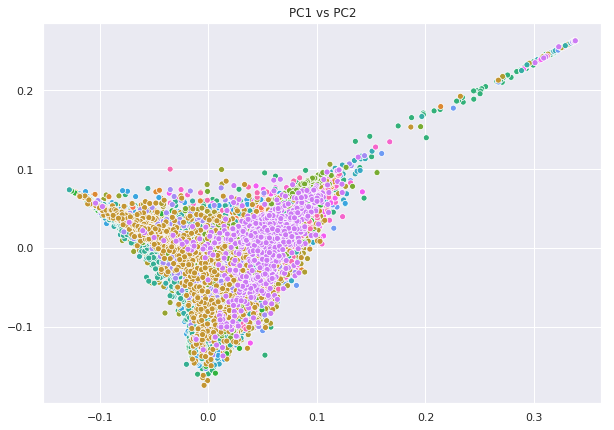

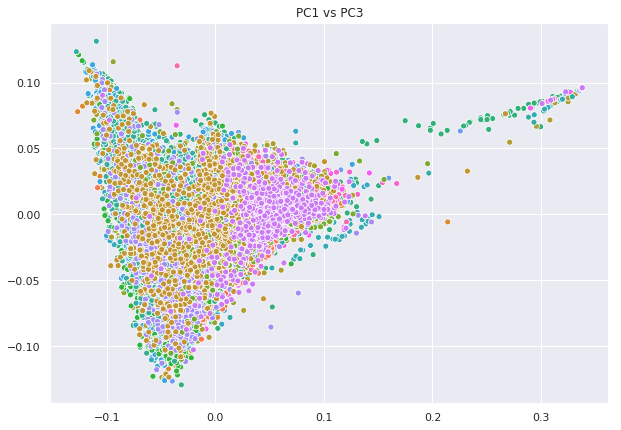

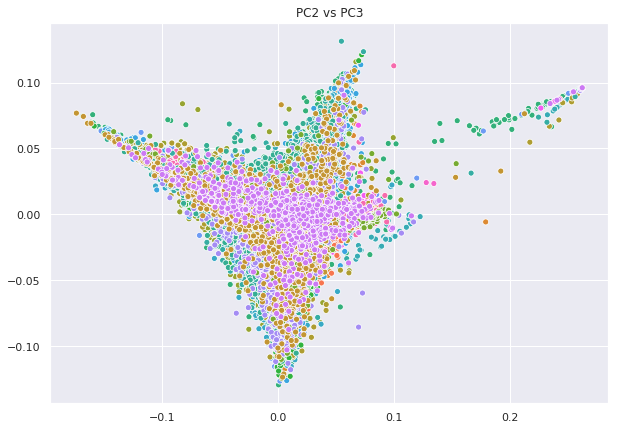

In [85]:

def pca_plots(vectors, labels):
    pca = PCA(n_components=3)
    pca.fit(vectors)
    pc_vectors = pca.transform(vectors)
    
    x = pc_vectors[:, 0]
    y = pc_vectors[:, 1]
    z = pc_vectors[:, 2]
    
    plt.figure(figsize=(10, 7))
    plt.title('PC1 vs PC2')
    ax = sns.scatterplot(x=x, y=y, hue=labels, legend=False)
    plt.show()
    
    plt.figure(figsize=(10, 7))
    plt.title('PC1 vs PC3')
    ax = sns.scatterplot(x=x, y=z, hue=labels, legend=False)
    plt.show()
    
    plt.figure(figsize=(10, 7))
    plt.title('PC2 vs PC3')
    ax = sns.scatterplot(x=y, y=z, hue=labels, legend=False)
    plt.show()

pca_plots(frame_vectors, labels)

In [81]:
print(frame_vectors.shape)

(28087, 900)


In [125]:

# Try batch averaging

batch_size = 2

new_frame_times = []
new_labels = []
new_vectors = []

for lbl in train_df.video_path.unique():
    lbl_df = train_df[train_df.video_path == lbl]
    lbl_vectors = lbl_df.drop(['frame_time', 'video_path'], axis=1).values
    for i in range(0, len(lbl_vectors)+batch_size, batch_size):
        vecs = lbl_vectors[i:i+batch_size]
        if not vecs.any():
            continue
        mean_vec = np.mean(vecs, axis=0)
        new_vectors.append(mean_vec)
        new_labels.append(lbl)
        new_frame_times.append(lbl_df.frame_time.iloc[0])
new_labels = np.array(new_labels)
new_vectors = np.array(new_vectors)
print(new_labels.shape)
print(new_vectors.shape)

(14048,)
(14048, 900)


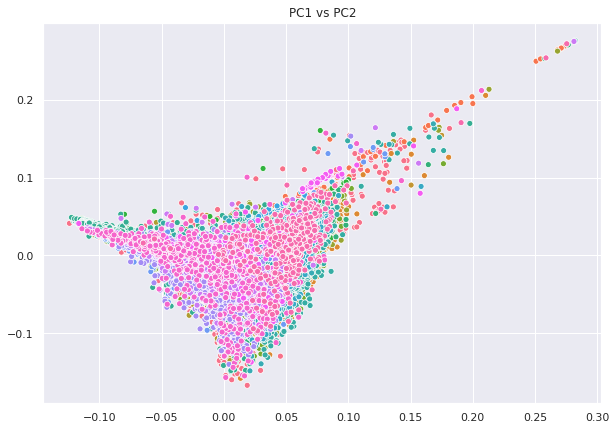

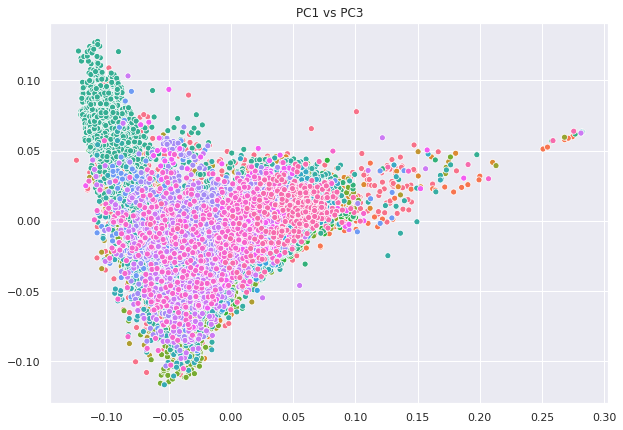

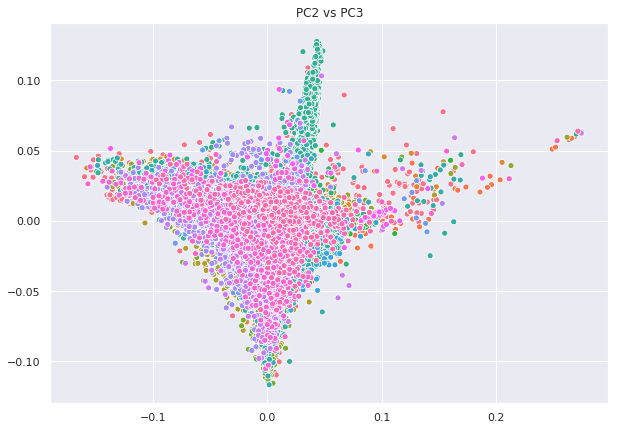

In [120]:
pca_plots(new_vectors, new_labels)

In [121]:
cols = {'frame_time': new_frame_times,
                       'video_path': new_labels}
for i in range(new_vectors.shape[1]):
    cols['x_'+str(i)] = new_vectors[:, i]
new_df = pd.DataFrame(cols)
print(train_df.shape)
print(new_df.shape)

(28087, 902)
(14048, 902)


In [122]:
new_df.to_csv('data/LOCALHIST_CORRUPT_batchavg_df.csv', index=False)